In [184]:
import numpy as np
import random
from shapely.geometry import Polygon,Point
import pandas as pd 
import h3
import folium

import matplotlib.pyplot as plt

In [185]:
#defining the desired polygon
poly = Polygon([(27.708160, 85.339501),
                (27.703002, 85.372067),
                (27.722503, 85.374131),
                (27.718207, 85.345394)])

In [186]:
#Defining the randomization generator
def polygon_random_points (poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    
    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

# Choose the number of points desired. This example uses 20 points. 
points = polygon_random_points(poly,40)

latitude = []
longitude = []

# Printing the results.
for p in points:
    latitude.append(p.x)
    longitude.append(p.y)

In [187]:
df_clients = pd.DataFrame()

df_clients['Latitude'] = latitude
df_clients['Longitude'] = longitude
df_clients.head()

,Latitude,Longitude
0,27.716142,85.367385
1,27.710534,85.358846
2,27.705465,85.362236
3,27.718066,85.349066
4,27.720124,85.359487


In [188]:
map = folium.Map(location=[df_clients.Latitude.mean(), df_clients.Longitude.mean()],
                 zoom_start=14, control_scale=True)

In [203]:
for index, location_info in df_clients.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)
    
map

In [190]:
#for index, row in df_clients.iterrows():
    

In [191]:
# #for converting to h3 ids from geolocations
# h3_clientsid_list = []

# h3_clientsid_df = pd.DataFrame()

# for index, row in df_clients.iterrows():
#     h3_clientsid_list.append(h3.geo_to_h3(row['Latitude'], row['Longitude'], resolution = 9))
    
# h3_clientsid_df['h3_id'] = h3_clientsid_list
# h3_clientsid_df.head()

In [192]:
# temp_tuple = h3.h3_to_geo_boundary(h3_clientsid_list[0], geo_json=False)

# df_temp = pd.DataFrame(temp_tuple,  columns=['Latitude', 'Longitude'])

# #temporarily made for visualizing the h3_id boundary 

# map = folium.Map(location=[df_temp.Latitude.mean(), df_temp.Longitude.mean()],
#               zoom_start=14, control_scale=True)

# for index, location_info in df_temp.iterrows():
#       folium.Marker([location_info["Latitude"], location_info["Longitude"]], 
#                     icon=folium.Icon(color='green')).add_to(map)
    
# #map

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaled_df_clients = MinMaxScaler().fit_transform(df_clients)

df_scaled = pd.DataFrame(scaled_df_clients)

D:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


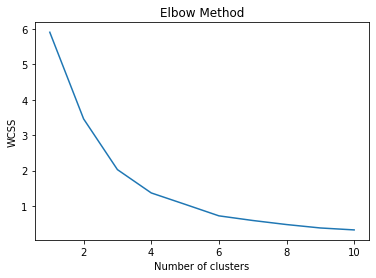

In [197]:
from sklearn.cluster import KMeans
sse = []

for i in range(1,11):
    model = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300)
    model.fit(df_scaled)
    sse.append(model.inertia_)

plt.plot(range(1,11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [209]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++',
               max_iter = 300, n_init = 10)

labels = kmeans.fit_predict(df_scaled)

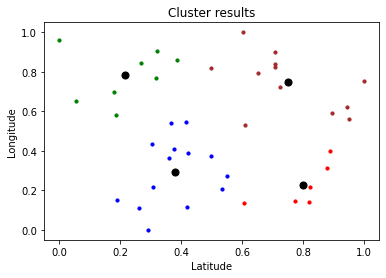

In [211]:
plt.scatter(df_scaled.iloc[labels==0,0], df_scaled.iloc[labels==0,1], s=10, c='red')
plt.scatter(df_scaled.iloc[labels==1,0], df_scaled.iloc[labels==1,1], s=10, c='green')
plt.scatter(df_scaled.iloc[labels==2,0], df_scaled.iloc[labels==2,1], s=10, c='blue')
plt.scatter(df_scaled.iloc[labels==3,0], df_scaled.iloc[labels==3,1], s=10, c='brown')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 50, c= 'black')
plt.title('Cluster results')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()